File name: model_trainer_and_tests

Description: This file contains the code to train the differnt support vector machines for the different intent matching uses cases. 

In [2]:
from sklearn.svm import SVC
import pandas as pd
import pickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import re


In [3]:
#load english language model in SpaCy 
nlp = spacy.load("en_core_web_sm")
vectoriser = CountVectorizer()

vocab = pd.read_csv("data/vocab.csv")

vectoriser.fit(vocab['vocab'].tolist()) # Fit vectoriser to training data
#vocabulary

with open('vectoriser.pkl', 'wb') as f: 
    pickle.dump(vectoriser, f)

def preprocess_text(text):

    doc = nlp(text)
    processed_tokens = []
    
    for token in doc: 
        if (not token.is_punct):
            processed_tokens.append(token.lemma_.lower())

    return processed_tokens

def represent_text_bow(processed_text):
    # Initalise CountVectoriser 
    processed_sentence = " ".join(processed_text) #join tokens back to string for vectoriser input
    #vectorise the processed sentence 
    text_vector = vectoriser.transform([processed_sentence])
    return text_vector 

# Model for intent matching

In [4]:
#model for intent matching 
data = pd.read_csv("data/intentions.csv")

raw_x = data['input'].tolist()
preprocessed_x = [preprocess_text(x) for x in raw_x]
x = [represent_text_bow(x).toarray()[0] for x in preprocessed_x]

y = data['intent'].tolist()

svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x,y)

with open("models/intent_model.pkl", "wb") as f: 
    pickle.dump(svm, f)

# Model for unrecognised input for name 

In [5]:

data = pd.read_csv("data/unrecognised_input_name.csv")

raw_x = data['input'].tolist()
preprocessed_x = [preprocess_text(x) for x in raw_x]
x = [represent_text_bow(x).toarray()[0] for x in preprocessed_x]

y = data['intent'].tolist()

svm = SVC(C=100, gamma=0.01, kernel='rbf')
svm.fit(x,y)

with open("models/unrecognsied_input_name_model.pkl", "wb") as f: 
    pickle.dump(svm, f)

# Model for unrecognised input for DOB 

In [6]:

data = pd.read_csv("data/unrecognised_input_DOB.csv")


raw_x = data['input'].tolist()
preprocessed_x = [preprocess_text(x) for x in raw_x]
x = [represent_text_bow(x).toarray()[0] for x in preprocessed_x]

y = data['intent'].tolist()

svm = SVC(C=100, gamma=0.01, kernel='rbf')
svm.fit(x,y)

with open("models/unrecognsied_input_DOB_model.pkl", "wb") as f: 
    pickle.dump(svm, f)

# Model for unrecognised input for handle_intent 

In [7]:

data = pd.read_csv("data/handle_intent.csv")


raw_x = data['input'].tolist()
preprocessed_x = [preprocess_text(x) for x in raw_x]
x = [represent_text_bow(x).toarray()[0] for x in preprocessed_x]

y = data['intent'].tolist()

svm = SVC(C=100, gamma=0.01, kernel='rbf')
svm.fit(x,y)

with open("models/handle_intent_model.pkl", "wb") as f: 
    pickle.dump(svm, f)

# Data exploration

In [8]:
data = pd.read_csv("data/unrecognised_input_DOB.csv")
data["intent"].value_counts()


intent
other          200
question       200
change_user    200
Name: count, dtype: int64

In [9]:
data = pd.read_csv("data/unrecognised_input_name.csv")
data["intent"].value_counts()

intent
other          200
question       200
change_user    200
Name: count, dtype: int64

In [10]:
data = pd.read_csv("data/intentions.csv")
data["intent"].value_counts()

intent
other            200
question         200
get_record       200
delete_record    200
update_record    200
change_user      200
Name: count, dtype: int64

In [11]:
data = pd.read_csv("data/handle_intent.csv")
data["intent"].value_counts()

intent
other          200
question       200
change_user    200
Name: count, dtype: int64

# Run tests on compiled models

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

handle_intent_test_data = pd.read_csv('test_data/handle_intent_test.csv')   
handle_intent_test_data['intent'].unique()

array(['question', 'other', 'change_user'], dtype=object)

# name SVM


accuracy score 0.9
precision [0.90909091 1.         0.83333333]
recall [1.  0.7 1. ]


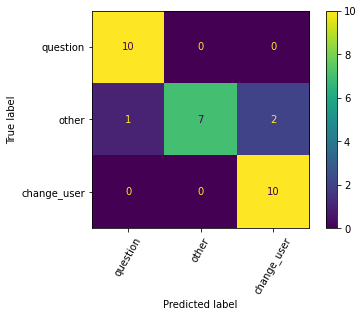

In [19]:
with open("models/unrecognsied_input_name_model.pkl", "rb") as f: 
    name_input_model = pickle.load(f)

name_test_data = pd.read_csv('test_data/name_test.csv')   

x_raw = name_test_data['input'].tolist()
x_pro = [preprocess_text(i) for i in x_raw]
x = [represent_text_bow(x).toarray()[0] for x in x_pro]

y = name_test_data['intent'].tolist()

pred = name_input_model.predict(x)

print(f'accuracy score {accuracy_score(y, pred)}')
print(f'precision {precision_score(y, pred,average=None)}')
print(f'recall {recall_score(y, pred, average=None)}')


cm = confusion_matrix(y, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=name_test_data['intent'].unique())
cm_display.plot(xticks_rotation=60)

# D.O.B SVM

accuracy score 0.9
precision [0.90909091 0.88888889 0.9       ]
recall [1.  0.8 0.9]


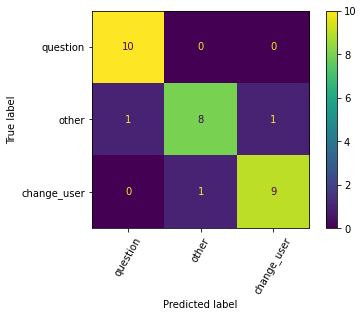

In [20]:
with open("models/unrecognsied_input_DOB_model.pkl", "rb") as f:
    dob_input_model = pickle.load(f)
    
dob_test_data = pd.read_csv('test_data/dob_test.csv')   

x_raw = dob_test_data['input'].tolist()
x_pro = [preprocess_text(i) for i in x_raw]
x = [represent_text_bow(x).toarray()[0] for x in x_pro]

y = dob_test_data['intent'].tolist()

pred = dob_input_model.predict(x)

print(f'accuracy score {accuracy_score(y, pred)}')
print(f'precision {precision_score(y, pred,average=None)}')
print(f'recall {recall_score(y, pred, average=None)}')


cm = confusion_matrix(y, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=dob_test_data['intent'].unique())
cm_display.plot(xticks_rotation=60)

# handle intent SVM

accuracy score 0.8333333333333334
precision [0.90909091 0.77777778 0.8       ]
recall [1.  0.7 0.8]


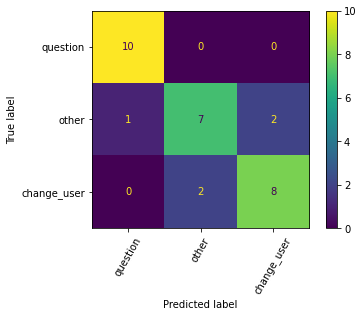

In [25]:
with open("models/handle_intent_model.pkl", "rb") as f: 
    handle_intent_model = pickle.load(f)
    
handle_intent_test_data = pd.read_csv('test_data/handle_intent_test.csv')   

x_raw = handle_intent_test_data['input'].tolist()
x_pro = [preprocess_text(i) for i in x_raw]
x = [represent_text_bow(x).toarray()[0] for x in x_pro]

y = handle_intent_test_data['intent'].tolist()

pred = handle_intent_model.predict(x)

print(f'accuracy score {accuracy_score(y, pred)}')
print(f'precision {precision_score(y, pred,average=None)}')
print(f'recall {recall_score(y, pred, average=None)}')


cm = confusion_matrix(y, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=handle_intent_test_data['intent'].unique())
cm_display.plot(xticks_rotation=60)

# Intent SVM

accuracy score 0.8166666666666667
precision [0.9        0.875      0.64285714 1.         0.88888889 0.72727273]
recall [0.9 0.7 0.9 0.8 0.8 0.8]


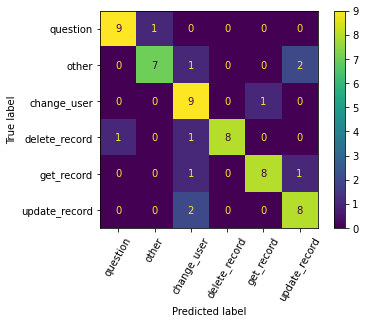

In [26]:
with open("models/intent_model.pkl", "rb") as f:
    intent_model = pickle.load(f)
    
intent_test_data = pd.read_csv('test_data/intent_test.csv')   

x_raw = intent_test_data['input'].tolist()
x_pro = [preprocess_text(i) for i in x_raw]
x = [represent_text_bow(x).toarray()[0] for x in x_pro]

y = intent_test_data['intent'].tolist()

pred = intent_model.predict(x)

print(f'accuracy score {accuracy_score(y, pred)}')
print(f'precision {precision_score(y, pred,average=None)}')
print(f'recall {recall_score(y, pred, average=None)}')


cm = confusion_matrix(y, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=intent_test_data['intent'].unique())
cm_display.plot(xticks_rotation=60)